# CA3 - Naive Bayes

### Amirhossein Abaskohi                              SID: 810197539

## Intoduction:

In this project we are going to examine Naive Bayes Classifier on comment classifying on sample data of Digikala.

Here we will use Preprocess data to have better guessing and also we will use Additive Smoothing.

In [1]:
from hazm import *
from csv import reader
import math
import matplotlib.pyplot as plt

### Phase 1: Preprocess data

In this part, we use hazm and some other codes to find main words and usable words for prediction.
First we normalize data, that means we normalizing using spaces and half-spaces.
Then we break string to its words. And Also we remove some stop words and unusuable signs and Also remove words with numbers and Englis letters.
After that clean the words(clearing some signs) and put cleaned words into new list that can be useful.

#### Question 1:

The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.


However, the two words differ in their flavor. Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .

Maybe this is in an information retrieval setting and you want to boost your algorithm’s recall. Or perhaps you are trying to analyze word usage in a corpus and wish to condense related words so that you don’t have as much variability. Either way, this technique of text normalization may be useful to you.

I used lemmatization. In considerig the goal of a sentence, we just need meaning of words here. So for simplification here we remove words that are in same root, for example verbs. So here we can use them easily to identify the goal of sentence, we do not need to know that word is plural or not or which tense the verb is in. This can reduce number of words because we check roots and we delete words that are same. Also as mentioned it reduces variety of same root word.

In [2]:
SHARP_SIGN = '#'
UNUSUABLE_SIGNS = {
    '@', '#', '$', '%', '^', '&', '*', ')',
    '(', ']', '[', '>', '<', '=', '+', '-',
    '_', '|', '/', '.', ':', ';', '?', '!', '`', '~', '،', ' '
}
BACKSLASH = "\\"
ONE_COUTE = "\'"
DOUBLE_COUTE = "\""
FUTURE_TENSE_SIGNS = ["خواهم", "خواهی", "خواهد", "خواهیم", "خواهید", "خواهند"]
ENGLISH_LETTERS_AND_DIGITS = {
    '1','2','3','4','5','6','7','8','9','0',
    'a','b','c','d','e','f','g','h','i','j','k',
    'l','m','n','o','p','q','r','s','t','u','v','w',
    'x','y','z','A','B','C','D','E','F','G','H','I','J',
    'K','L','M','N','O','P','Q','R','S','T','U','V','W',
    'X','Y','Z','۱','۲','۳','۴','۵','۶','۷','۸','۹','۰'
}
UNUSABLE_WORDS = {
    "که"
    , "از"
    , "بر"
    , "به"
    , "با"
    , "در"
    , "روی"
    , "اما"
    , "فقط"
    , "و"
    , "هم"
    , "آن"
    , "این"
    , "چیز"
    , "زیر"
    , "رو"
    , "ها"
    , "یا"
    , "نه"
    , "ولی"
    , "تا"
    , "ولو"
    , "اگر"
    , "اگه"
    , "درصد"
    , "بالا"
    , "پایین"
    , "چپ"
    , "راست"
    , "یه"
    , "یک"
    , "من"
    , "تو"
    , "او"
    , "ما"
    , "شما"
    , "هر"
    , "چون"
    , "برای"
    , "اینکه"
    , "هست"
    , "است"
    , "نیست"
    , "واقعا"
    , "کرد"
    , "شد"
    , "شده"
    , "شدم"
    , "دو"
    , "سه"
    , "چهار"
    , "چاهار"
    , "پنج"
    , "شش"
    , "هفت"
    , "هشت"
    , "نه"
    , "بار"
    , "هزار"
    , "میلیون"
    , "تومن"
    , "دلار"
    , "میشه"
    , "داشته"
    , "باشه"
}
lemmatizer = Lemmatizer()
pNumberOfWordsInRecom = 0
pNumberOfWordsInNotRecom = 0
NumberOfWordsInRecom = 0
NumberOfWordsInNotRecom = 0
numberOfRecommends = 3000

In [3]:
def normalizeString(string):
    normalizer = Normalizer()
    return normalizer.normalize(string)

def changeIfIsFutureTense(word):
    if len(word) < 6:
        return word
    firstFiveLetters = word[:5]
    if firstFiveLetters in FUTURE_TENSE_SIGNS:
        word = word[5:]
        result = ""
        for char in word:
            if char == "\u200c":
                continue
            else:
                result += char
        return result
    return word

def simplifyString(words):
    for i in range(len(words)):
        if(words[i] == "برند"):
            continue
        changedWord = changeIfIsFutureTense(words[i])
        lemmatizedWord = lemmatizer.lemmatize(changedWord)
        splittedBySharp = lemmatizedWord.split(SHARP_SIGN)
        words[i] = splittedBySharp[0]
        
def cleanWord(word):
    result = ""
    for char in word:
        if char not in UNUSUABLE_SIGNS and char != BACKSLASH and char != ONE_COUTE and char != DOUBLE_COUTE:
            result += char
    return result

def isNumberOrEnglishLetter(word):
    for char in ENGLISH_LETTERS_AND_DIGITS:
        if char in word:
            return True
    return False
        
def removeUnusablesAndDuplicates(words):
    outWords = list()
    for word in words:
        cleanedWord = cleanWord(word)
        if cleanedWord == "" or cleanedWord in UNUSABLE_WORDS or isNumberOrEnglishLetter(cleanedWord):
            continue
        outWords.append(cleanedWord)
    return outWords

def preProcessData(comment):
    normalizedComment = normalizeString(comment)
    words = word_tokenize(normalizedComment)
    simplifyString(words)
    preProcessedData = removeUnusablesAndDuplicates(words)
    return preProcessedData

### Phase2: Soving and Phase3: Assestment

Here we have some train data. First we read this file using CSVReader of csv library. Then for every row in train file we do the following:

* Preprocess the comment and title and concat them
* In Preprocess words list, we check that it is in which class, then add to its key in dictionary

So After this we have number of repetation of words in each class. We will use this to calculate the probabilities.

#### Question 2:

Posterior here is out final wanted result. It is P(recommended | w). Here w is showing words in the title and comment.

Prior here is probability of being recommended without any evidence.

Evidences here are the words.

Likehood is showing probability of being a word in recommended class.

Prior is calculated easily. It is just (number_of_recommended_trains/number_of_all_trains).

For calculating likehood, we sum out all number of words in each category. Also we sum out number of repetation of each word in each catogory(talked in last markdown part). So the probability of one word in some category for example 
P("دی جی کالا" | recommended) is ratio of repetation of "دی جی کالا" to all words in recommended.

Posterior probability is calculated using top things. It is multiplication of P(recommended) * P(w1 | recommended) * P(w2 | recommended) ... .

In [4]:
with open('comment_train.csv', 'r', encoding="utf8") as readObj:
    csvReader = reader(readObj)
    listOfRows = list(csvReader)
    del listOfRows[0]

In [5]:
def preProcessedClassify(trains):
    global pNumberOfWordsInRecom
    global pNumberOfWordsInNotRecom
    recommended = dict()
    notRecommended = dict()
    for train in trains:
        words = preProcessData(train[0]) +  preProcessData(train[1])
        if train[2] == "recommended":
            pNumberOfWordsInRecom += len(words)
        else:
            pNumberOfWordsInNotRecom += len(words)
        for word in words:
            if word not in recommended:
                recommended[word] = 0
            if word not in notRecommended:
                notRecommended[word] = 0
            if train[2] == "recommended":
                recommended[word] += 1
            else:
                notRecommended[word] += 1
    return recommended, notRecommended

def unPrePrecoessedClassify(trains):
    global NumberOfWordsInRecom
    global NumberOfWordsInNotRecom
    recommended = dict()
    notRecommended = dict()
    for train in trains:
        words = train[0].split() +  train[1].split()
        if train[2] == "recommended":
            NumberOfWordsInRecom += len(words)
        else:
            NumberOfWordsInNotRecom += len(words)
        for word in words:
            if word not in recommended:
                recommended[word] = 0
            if word not in notRecommended:
                notRecommended[word] = 0
            if train[2] == "recommended":
                recommended[word] += 1
            else:
                notRecommended[word] += 1
    return recommended, notRecommended

In [6]:
pr, pnr = preProcessedClassify(listOfRows)
r, nr = unPrePrecoessedClassify(listOfRows)

In [7]:
def preProcessedIsCommentRecommended(comment, title):
    words = preProcessData(comment) + preProcessData(title)
    totalRecom = math.log10(numberOfRecommends/len(listOfRows))
    totalNotRecom = math.log10((len(listOfRows) - numberOfRecommends)/len(listOfRows))
    for word in words:
        if word not in r:
            continue
        if pr[word] == 0:
            return False
        if pnr[word] == 0:
            return True
        totalRecom += math.log10(pr[word]/pNumberOfWordsInRecom)
        totalNotRecom += math.log10(pnr[word]/pNumberOfWordsInNotRecom)
    if totalRecom >= totalNotRecom:
        return True
    return False

def isCommentRecommended(comment, title):
    words = preProcessData(comment) + preProcessData(title)
    totalRecom = math.log10(numberOfRecommends/len(listOfRows))
    totalNotRecom = math.log10((len(listOfRows) - numberOfRecommends)/len(listOfRows))
    for word in words:
        if word not in r:
            continue
        if r[word] == 0:
            return False
        if nr[word] == 0:
            return True
        totalRecom += math.log10(r[word]/NumberOfWordsInNotRecom)
        totalNotRecom += math.log10(nr[word]/NumberOfWordsInNotRecom)
    if totalRecom >= totalNotRecom:
        return True
    return False

In [8]:
with open('comment_test.csv', 'r', encoding="utf8") as readObj:
    csvReader = reader(readObj)
    tests = list(csvReader)
    del tests[0]

In [9]:
def test(tests):
    passedTests = 0
    numberOfRecommended = 0
    numberOfCorrectRecommended = 0
    numberOfRecmGuess = 0
    for test in tests:
        guess = isCommentRecommended(test[1], test[0])
        if test[2] == "recommended":
            numberOfRecommended += 1
        if guess:
            numberOfRecmGuess += 1
        if  guess and test[2] == "recommended":
            passedTests += 1
            numberOfCorrectRecommended += 1
        elif not guess and test[2] != "recommended":
            passedTests += 1
    accuracy = (passedTests / len(tests))
    presision = (numberOfCorrectRecommended/numberOfRecmGuess)
    recall = (numberOfCorrectRecommended/numberOfRecommended)
    F1 = 2 * ((presision*recall)/(presision+recall))
    return accuracy, presision, recall, F1

def preProcessedTest(test):
    passedTests = 0
    numberOfRecommended = 0
    numberOfCorrectRecommended = 0
    numberOfRecmGuess = 0
    for test in tests:
        guess = preProcessedIsCommentRecommended(test[1], test[0])
        if test[2] == "recommended":
            numberOfRecommended += 1
        if guess:
            numberOfRecmGuess += 1
        if  guess and test[2] == "recommended":
            passedTests += 1
            numberOfCorrectRecommended += 1
        elif not guess and test[2] != "recommended":
            passedTests += 1
    accuracy = (passedTests / len(tests))
    presision = (numberOfCorrectRecommended/numberOfRecmGuess)
    recall = (numberOfCorrectRecommended/numberOfRecommended)
    F1 = 2 * ((presision*recall)/(presision+recall))
    return accuracy, presision, recall, F1

In [10]:
pAcc, pPre, pRec, pF1 = preProcessedTest(tests)
Acc, Pre, Rec, F1 = test(tests)

In [11]:
print("Accuracy in preprocess test: " + str(pAcc))
print("Accuracy in unpreprocess test: " + str(Acc))
print("-------------------------------------------------------")
print("Presision in preprocess test: " + str(pPre))
print("Presision in unpreprocess test: " + str(Pre))
print("-------------------------------------------------------")
print("Recall in preprocess test: " + str(pRec))
print("Recall in unpreprocess test: " + str(Rec))
print("-------------------------------------------------------")
print("F1 in preprocess test: " + str(pF1))
print("F1 in unpreprocess test: " + str(F1))

Accuracy in preprocess test: 0.9025
Accuracy in unpreprocess test: 0.86
-------------------------------------------------------
Presision in preprocess test: 0.8946078431372549
Presision in unpreprocess test: 0.8380281690140845
-------------------------------------------------------
Recall in preprocess test: 0.9125
Recall in unpreprocess test: 0.8925
-------------------------------------------------------
F1 in preprocess test: 0.9034653465346535
F1 in unpreprocess test: 0.864406779661017


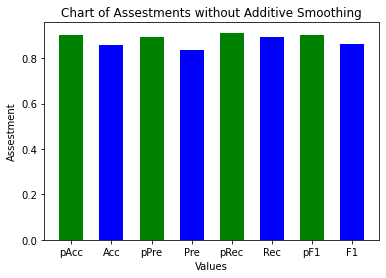

In [12]:
left = [1,2,3,4,5,6,7,8]
height = [pAcc, Acc, pPre, Pre, pRec, Rec, pF1, F1]
tickLabel = ['pAcc', 'Acc', 'pPre', 'Pre', 'pRec', 'Rec', 'pF1', 'F1']
plt.bar(left, height, tick_label = tickLabel, 
        width = 0.6, color = ['green', 'blue']) 
plt.xlabel('Values') 
plt.ylabel('Assestment') 
plt.title('Chart of Assestments without Additive Smoothing') 
plt.show() 

### Using additive smoothing:

Additive smoothing is a way to estimate probability. In this we we would not have zero probability and can be better estimation for probabilities to predict class of one comment.

#### Question 3:

When one word is just used in one category, so the probability in other category will be zero. As we mentioned in Question2, posterior is multplication. So when probability of one word in one special category is 0, that makes all zero and so other caregory absolutely will be the answer and we know it is not true.

#### Question 4:

In statistics, additive smoothing, also called Laplace smoothing (not to be confused with Laplacian smoothing as used in image processing), or Lidstone smoothing, is a technique used to smooth categorical data. The formula is:

![alt text](1.png)

Here alpha is smoothing paramter that we set it as 1. d is number of different type of values.

But how this help us? As we mentioned when a probability is zero that make all of chance of that group zero, but we know it is not true and other words are so effective. So when we use additive smoothing because of (+alpha) at top of ration, we would not have zero probability. So all words will be considered in calculation so we can have better predictions.

Calculation of addtivce smoothing is done in calAdditiveProbability function.

In [13]:
pDifferentUsedWordsRecom = 0 
pDifferentUsedWordsNotRecom = 0
differentUsedWordsRecom = 0
differentUsedWordsNotRecom = 0
for x in r.values():
    if x != 0:
        differentUsedWordsRecom += 1
for x in nr.values():
    if x != 0:
        differentUsedWordsNotRecom += 1
for x in pr.values():
    if x != 0:
        pDifferentUsedWordsRecom += 1
for x in pnr.values():
    if x != 0:
        pDifferentUsedWordsNotRecom += 1

In [14]:
def calAdditiveProbability(x, N, alpha, d):
    return (x+alpha)/(N + alpha * d)

def preProcessedIsCommentRecommendedAdditiveSmoothing(comment, title):
    words = comment.split() + title.split()
    totalRecom = math.log10(calAdditiveProbability(numberOfRecommends, len(listOfRows), 1, 2))
    totalNotRecom = math.log10(calAdditiveProbability(len(listOfRows)-numberOfRecommends, len(listOfRows), 1, 2))
    for word in words:
        if word not in r:
            continue
        totalRecom += math.log10(calAdditiveProbability(r[word], NumberOfWordsInRecom, 1, differentUsedWordsRecom))
        totalNotRecom += math.log10(calAdditiveProbability(nr[word], NumberOfWordsInNotRecom, 1, differentUsedWordsNotRecom))
    if totalRecom >= totalNotRecom:
        return True
    return False

def isCommentRecommendedAdditiveSmoothing(comment, title):
    words = preProcessData(comment) + preProcessData(title)
    totalRecom = math.log10(calAdditiveProbability(numberOfRecommends, len(listOfRows), 1, 2))
    totalNotRecom = math.log10(calAdditiveProbability(len(listOfRows)-numberOfRecommends, len(listOfRows), 1, 2))
    for word in words:
        if word not in pr:
            continue
        totalRecom += math.log10(calAdditiveProbability(pr[word], pNumberOfWordsInRecom, 1, pDifferentUsedWordsRecom))
        totalNotRecom += math.log10(calAdditiveProbability(pnr[word], pNumberOfWordsInNotRecom, 1, pDifferentUsedWordsNotRecom))
    if totalRecom >= totalNotRecom:
        return True
    return False

def testAdditive(tests):
    passedTests = 0
    numberOfRecommended = 0
    numberOfCorrectRecommended = 0
    numberOfRecmGuess = 0
    for test in tests:
        guess = isCommentRecommendedAdditiveSmoothing(test[1], test[0])
        if guess:
            numberOfRecmGuess += 1
        if test[2] == "recommended":
            numberOfRecommended += 1
        if guess and test[2] == "recommended":
            passedTests += 1
            numberOfCorrectRecommended += 1
        elif not guess and test[2] != "recommended":
            passedTests += 1
    accuracy = (passedTests / len(tests))
    presision = (numberOfCorrectRecommended/numberOfRecmGuess)
    recall = (numberOfCorrectRecommended/numberOfRecommended)
    F1 = 2 * ((presision*recall)/(presision+recall))
    return accuracy, presision, recall, F1

def preTestAdditive(tests):
    passedTests = 0
    numberOfRecommended = 0
    numberOfCorrectRecommended = 0
    numberOfRecmGuess = 0
    for test in tests:
        guess = preProcessedIsCommentRecommendedAdditiveSmoothing(test[1], test[0])
        if guess:
            numberOfRecmGuess += 1
        if test[2] == "recommended":
            numberOfRecommended += 1
        if guess and test[2] == "recommended":
            passedTests += 1
            numberOfCorrectRecommended += 1
        elif not guess and test[2] != "recommended":
            passedTests += 1
    accuracy = (passedTests / len(tests))
    presision = (numberOfCorrectRecommended/numberOfRecmGuess)
    recall = (numberOfCorrectRecommended/numberOfRecommended)
    F1 = 2 * ((presision*recall)/(presision+recall))
    return accuracy, presision, recall, F1

In [15]:
apAcc, apPre, apRec, apF1 = preTestAdditive(tests)
aAcc, aPre, aRec, aF1 = testAdditive(tests)

In [16]:
print("Accuracy in preprocess test: " + str(apAcc))
print("Accuracy in unpreprocess test: " + str(aAcc))
print("-------------------------------------------------------")
print("Presision in preprocess test: " + str(apPre))
print("Presision in unpreprocess test: " + str(aPre))
print("-------------------------------------------------------")
print("Recall in preprocess test: " + str(apRec))
print("Recall in unpreprocess test: " + str(aRec))
print("-------------------------------------------------------")
print("F1 in preprocess test: " + str(apF1))
print("F1 in unpreprocess test: " + str(aF1))

Accuracy in preprocess test: 0.93875
Accuracy in unpreprocess test: 0.92875
-------------------------------------------------------
Presision in preprocess test: 0.9354838709677419
Presision in unpreprocess test: 0.9234567901234568
-------------------------------------------------------
Recall in preprocess test: 0.9425
Recall in unpreprocess test: 0.935
-------------------------------------------------------
F1 in preprocess test: 0.9389788293897883
F1 in unpreprocess test: 0.929192546583851


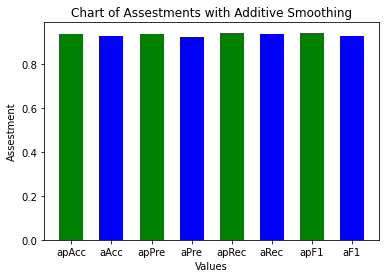

In [17]:
left = [1,2,3,4,5,6,7,8]
height = [apAcc, aAcc, apPre, aPre, apRec, aRec, apF1, aF1]
tickLabel = ['apAcc', 'aAcc', 'apPre', 'aPre', 'apRec', 'aRec', 'apF1', 'aF1']
plt.bar(left, height, tick_label = tickLabel, 
        width = 0.6, color = ['green', 'blue']) 
plt.xlabel('Values') 
plt.ylabel('Assestment') 
plt.title('Chart of Assestments with Additive Smoothing') 
plt.show() 

#### Question 5:

Precision by its own, is not enough. Imagine a dataset that in which there are 800 tests and 700 are recommended and 100 are not. Now imagine we just found just 3 recommended al there were true. So out precision is 1 but we k that we have detected 697 truely. So it is not showing us information about false detections.

Recall also is not enough bt its own. Imagine we have a dataset in which there are 800 tests and 700 are not recommended and 100 are recommended. Now imagine we detected all recommended. So the recall is 1 but it is not true we detected 700 tests wrong. It is because we do not consider false detections again. We detect some which were not recommended as recommended.

#### Question 6:

The F1 score is the harmonic mean of precision and recall taking both metrics into account in the following equation:
![alt text](2.png)
We use the harmonic mean instead of a simple average because it punishes extreme values.

 A classifier with a precision of 1.0 and a recall of 0.0 has a simple average of 0.5 but an F1 score of 0. The F1 score gives equal weight to both measures and is a specific example of the general Fβ metric where β can be adjusted to give more weight to either recall or precision. 
 
 If we want to create a balanced classification model with the optimal balance of recall and precision, then we try to maximize the F1 score.
 
 #### Question 7:
 
 ![alt text](3.png)
 
 #### Question 8:
 
 As we see in the above table, when using preprocess, so we put same root words as one word. So this can make us to have better prediction. As  the  number  of  values  increases  (which  is  common  in  marketing  applications), preprocessing the categorical attributes becomes attractive in order to improve the performance  of  classifiers.  The  issue  of  grouping  methods  is  to  reduce  the  number  of  groups  of  values while maintaining the conditional class information.

Also we can understand that additive smoothing makes our predictions better, because it consider all words and some word that are just in one special groups does not affect on our prediction.

So using additive and preprocessing improve our prediction. Also the way of preprocessing is so important and a bad preprocessing can have bad influences.

#### Question 9:

*  تازه خریدم یه مدت کار بکنه مشخص میشه کیفیت قطعاتش - وری گود
*  با این قیمت گزینه های بهتری هم میشه گرفت.روان مینویسه ولی زیاد مناسب نیست و رنگ پس میده یه وقتایی موقع نوشتن - زیاد مناسب نیست رنگ پس میده یه وقتایی موقع نوشتن
*  کاور مقاوم و قشنگیه اما متأسفانه مدت زیادیه که ناموجوده...اگر موجود بشه قطعاً سه تا سفارش می‌دمرنگ طلاییش که فوق‌العاده زیباست و طراحی لبه‌ها به نحویه که دست رو اذیت نمی‌کنهلطفاً موجود بشه ممنون - mi 4w
*  فندک قبلیم مدام فیوز میسوزوند و یک بار شارژر موبایل هم سوزوند ولی با این هیچ مشکلی بوجود نیومده تا الان. کیفیتش خیلی خوبه و لامپ هم داره - خیالم راحت شد
*  ایراد دستگاه - ایراد دستگاه

![alt text](4.gif)

These are 5 comments and their titles that we had wrong detection. 

Learning a Naive Bayes classifier is just a matter of counting how many times each attribute co-occurs with each class. Naive Bayes is the most simple algorithm that you can apply to your data. As the name suggests, here this algorithm makes an assumption as all the variables in the dataset is “Naive” i.e not correlated to each other. This is what we did here: we used bag of words, although we know words are correlated to each other. For example in second problem that mentioned we have: "بهتر" but it is not showing positive comment here, althought the word itself is positive.

Another problem that was here is that when we met some new word that we do not seen it before, we skip it, it is better to mke a dictionary table that shows positiveness of one word. So we can include those words to have better predictions.

# Conclusion:

One limitation Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.

But Naive Bayes is so simple to implement and it is fast. In implementation using Smoothing and Preprocesses can be so useful.